In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/Edge/Desktop'

In [3]:
df=pd.read_csv("results.csv")

In [4]:
x=df['home_score']-df['away_score']
conditions=[(x>0),(x<0),(x==0)]
values=['win','lose','draw']

In [5]:
df['result'] = np.select(conditions, values)

In [6]:
df['result'].value_counts()

win     21009
lose    12224
draw     9955
Name: result, dtype: int64

In [7]:
df_noneutral=df[df['neutral']==False]

In [8]:
df_noneutralspain=df_noneutral[df_noneutral['country']=='Spain']

In [9]:
df_noneutralspain

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
347,01/12/1912,Catalonia,France,1,0,Friendly,Barcelona,Spain,False,win
415,03/01/1915,Basque Country,Catalonia,6,1,Friendly,Bilbao,Spain,False,win
417,07/02/1915,Catalonia,Basque Country,2,2,Friendly,Barcelona,Spain,False,draw
419,13/05/1915,Basque Country,Catalonia,1,0,Friendly,Madrid,Spain,False,win
432,21/05/1916,Catalonia,Basque Country,1,3,Friendly,Barcelona,Spain,False,lose
...,...,...,...,...,...,...,...,...,...,...
42416,14/06/2021,Spain,Sweden,0,0,UEFA Euro,Seville,Spain,False,draw
42454,19/06/2021,Spain,Poland,1,1,UEFA Euro,Seville,Spain,False,draw
42472,23/06/2021,Spain,Slovakia,5,0,UEFA Euro,Seville,Spain,False,win
42675,05/09/2021,Spain,Georgia,4,0,FIFA World Cup qualification,Badajoz,Spain,False,win


In [10]:
df_noneutralspainhome=df_noneutralspain[df_noneutralspain['home_team']=='Spain']

In [11]:
df_noneutralspainhome

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
622,18/12/1921,Spain,Portugal,3,1,Friendly,Madrid,Spain,False,win
696,28/01/1923,Spain,France,3,0,Friendly,San Sebastián,Spain,False,win
779,16/12/1923,Spain,Portugal,3,0,Friendly,Seville,Spain,False,win
862,21/12/1924,Spain,Austria,2,1,Friendly,Barcelona,Spain,False,win
894,14/06/1925,Spain,Italy,1,0,Friendly,Valencia,Spain,False,win
...,...,...,...,...,...,...,...,...,...,...
42416,14/06/2021,Spain,Sweden,0,0,UEFA Euro,Seville,Spain,False,draw
42454,19/06/2021,Spain,Poland,1,1,UEFA Euro,Seville,Spain,False,draw
42472,23/06/2021,Spain,Slovakia,5,0,UEFA Euro,Seville,Spain,False,win
42675,05/09/2021,Spain,Georgia,4,0,FIFA World Cup qualification,Badajoz,Spain,False,win


In [12]:
df_noneutralspainhome['tournament'].value_counts()

Friendly                        179
UEFA Euro qualification          62
FIFA World Cup qualification     61
UEFA Euro                         5
FIFA World Cup                    5
UEFA Nations League               5
Name: tournament, dtype: int64

In [13]:
df_spaineuroqualifiction=df_noneutralspainhome[df_noneutralspainhome['tournament']=='UEFA Euro qualification']

In [14]:
df_spaineuroqualifiction

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
4606,14/10/1959,Spain,Poland,3,0,UEFA Euro qualification,Madrid,Spain,False,win
5260,01/11/1962,Spain,Romania,6,0,UEFA Euro qualification,Madrid,Spain,False,win
5428,30/05/1963,Spain,Northern Ireland,1,1,UEFA Euro qualification,Bilbao,Spain,False,draw
5596,11/03/1964,Spain,Republic of Ireland,5,1,UEFA Euro qualification,Seville,Spain,False,win
6403,07/12/1966,Spain,Republic of Ireland,2,0,UEFA Euro qualification,Valencia,Spain,False,win
...,...,...,...,...,...,...,...,...,...,...
37490,09/10/2015,Spain,Luxembourg,4,0,UEFA Euro qualification,Logroño,Spain,False,win
40677,23/03/2019,Spain,Norway,2,1,UEFA Euro qualification,Valencia,Spain,False,win
40889,10/06/2019,Spain,Sweden,3,0,UEFA Euro qualification,Madrid,Spain,False,win
41581,15/11/2019,Spain,Malta,7,0,UEFA Euro qualification,Cádiz,Spain,False,win


In [15]:
conditions = [
    (df_spaineuroqualifiction['tournament']=='UEFA Euro qualification') 
    ]

In [16]:
values=['UEFA Euro qualification']

In [17]:
df_spaineuroqualifiction['home games in euro qualification'] = np.select(conditions, values)

/var/folders/jz/hk1412pd4bbdhjt78vrlf33r0000gn/T/ipykernel_3263/3642666629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spaineuroqualifiction['home games in euro qualification'] = np.select(conditions, values)


In [18]:
x=pd.crosstab(df_spaineuroqualifiction['home games in euro qualification'],df_spaineuroqualifiction['result'],margins=True)

In [19]:
x

result,draw,lose,win,All
home games in euro qualification,,,,
UEFA Euro qualification,6,4,52,62
All,6,4,52,62


In [20]:
df_spainwcqualification=df_noneutralspainhome[df_noneutralspainhome['tournament']=='FIFA World Cup qualification']

In [21]:
conditions = [
    (df_spainwcqualification['tournament']=='FIFA World Cup qualification') 
    ]

In [22]:
values=['World Cup Games in Spain qualification']

In [23]:
df_spainwcqualification['World Cup Games in Spain qualification'] = np.select(conditions, values)

/var/folders/jz/hk1412pd4bbdhjt78vrlf33r0000gn/T/ipykernel_3263/794567014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spainwcqualification['World Cup Games in Spain qualification'] = np.select(conditions, values)


In [24]:
y=pd.crosstab(df_spainwcqualification['World Cup Games in Spain qualification'],df_spainwcqualification['result'],margins=True)
y

result,draw,win,All
World Cup Games in Spain qualification,,,
World Cup Games in Spain qualification,10,51,61
All,10,51,61


In [25]:
df_spainFriendly=df_noneutralspainhome[df_noneutralspainhome['tournament']=='Friendly']

In [26]:
conditions = [
    (df_spainFriendly['tournament']=='Friendly') 
    ]

In [27]:
values=['Friendly']

In [28]:
df_spainFriendly['Friendly'] = np.select(conditions, values)

/var/folders/jz/hk1412pd4bbdhjt78vrlf33r0000gn/T/ipykernel_3263/3820674669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spainFriendly['Friendly'] = np.select(conditions, values)


In [29]:
z=pd.crosstab(df_spainFriendly['Friendly'],df_spainFriendly['result'],margins=True)
z

result,draw,lose,win,All
Friendly,,,,
Friendly,38,30,111,179
All,38,30,111,179


In [30]:
x=np.array(x)
x

array([[ 6,  4, 52, 62],
       [ 6,  4, 52, 62]])

In [31]:
y=np.array(y)
y

array([[10, 51, 61],
       [10, 51, 61]])

In [32]:
z=np.array(z)
z

array([[ 38,  30, 111, 179],
       [ 38,  30, 111, 179]])

In [33]:
from statsmodels.stats.proportion import proportion_confint

In [34]:
import numpy as np
from scipy.stats import norm,t

In [35]:
CI_spaineuroqual=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_spaineuroqual

(0.7471588595152658, 0.9302604953234439)

In [36]:
CI_spainwcqual=proportion_confint(count=y[0,1],nobs=y[0,2],alpha=(1-.95))
CI_spainwcqual

(0.743160715196361, 0.9289704323446227)

In [37]:
    CI_spainfreindly=proportion_confint(count=z[0,2],nobs=z[0,3],alpha=(1-.95))
CI_spainfreindly

(0.5490092941741966, 0.6912141695129541)

In [38]:
ci_spain= {}
ci_spain['euro qual or wc Qual or freindly' ] = ['euro qual','wc qual', 'freindly']
ci_spain['lb'] = [CI_spaineuroqual[0],CI_spainwcqual[0],CI_spainfreindly[0]]
ci_spain['ub'] = [CI_spaineuroqual[1],CI_spainwcqual[1],CI_spainfreindly[1]]
df_ci= pd.DataFrame(ci_spain)
df_ci

,euro qual or wc Qual or freindly,lb,ub
0,euro qual,0.747159,0.930260
1,wc qual,0.743161,0.928970
2,freindly,0.549009,0.691214


([<matplotlib.axis.YTick at 0x7f90152e9370>,
 [Text(0, 0, 'euro qual'), Text(0, 1, 'wc qual'), Text(0, 2, 'freindly')])

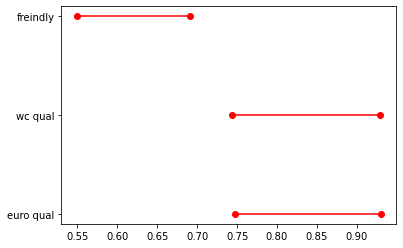

In [39]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['euro qual or wc Qual or freindly']))

In [40]:
df_noneutralItaly=df_noneutral[df_noneutral['country']=='Italy']

In [41]:
df_noneutralItalyhome=df_noneutralItaly[df_noneutralItaly['home_team']=='Italy']

In [42]:
df_Italyeuroqualifiction=df_noneutralItalyhome[df_noneutralItalyhome['tournament']=='UEFA Euro qualification']

In [43]:
conditions = [
    (df_Italyeuroqualifiction['tournament']=='UEFA Euro qualification') 
    ]
values=['UEFA Euro qualification']

In [44]:
df_Italyeuroqualifiction['home games in euro qualification'] = np.select(conditions, values)

/var/folders/jz/hk1412pd4bbdhjt78vrlf33r0000gn/T/ipykernel_3263/4149999335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Italyeuroqualifiction['home games in euro qualification'] = np.select(conditions, values)


In [45]:
x=pd.crosstab(df_Italyeuroqualifiction['home games in euro qualification'],df_Italyeuroqualifiction['result'],margins=True)
x

result,draw,lose,win,All
home games in euro qualification,,,,
UEFA Euro qualification,14,3,42,59
All,14,3,42,59


In [46]:
x=np.array(x)
x

array([[14,  3, 42, 59],
       [14,  3, 42, 59]])

In [47]:
df_Italywcqualification=df_noneutralItalyhome[df_noneutralItalyhome['tournament']=='FIFA World Cup qualification']

In [48]:
conditions = [
    (df_Italywcqualification['tournament']=='FIFA World Cup qualification') 
    ]

In [49]:
values=['FIFA World Cup qualification']

In [50]:
df_Italywcqualification['World Cup Games in Italy qualification'] = np.select(conditions, values)

/var/folders/jz/hk1412pd4bbdhjt78vrlf33r0000gn/T/ipykernel_3263/3167593451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Italywcqualification['World Cup Games in Italy qualification'] = np.select(conditions, values)


In [51]:
y=pd.crosstab(df_Italywcqualification['World Cup Games in Italy qualification'],df_Italywcqualification['result'],margins=True)
y

result,draw,win,All
World Cup Games in Italy qualification,,,
FIFA World Cup qualification,11,48,59
All,11,48,59


In [52]:
y=np.array(y)
y

array([[11, 48, 59],
       [11, 48, 59]])

In [53]:
df_ItalyFriendly=df_noneutralItalyhome[df_noneutralItalyhome['tournament']=='Friendly']

In [54]:
conditions = [
    (df_ItalyFriendly['tournament']=='Friendly') 
    ]
values=['Freindly']

In [55]:
df_ItalyFriendly['Friendly'] = np.select(conditions, values)

/var/folders/jz/hk1412pd4bbdhjt78vrlf33r0000gn/T/ipykernel_3263/983895876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ItalyFriendly['Friendly'] = np.select(conditions, values)


In [56]:
z=pd.crosstab(df_ItalyFriendly['Friendly'],df_ItalyFriendly['result'],margins=True)
z

result,draw,lose,win,All
Friendly,,,,
Freindly,54,25,133,212
All,54,25,133,212


In [57]:
z=np.array(z)
z

array([[ 54,  25, 133, 212],
       [ 54,  25, 133, 212]])

In [58]:
CI_Italyeuroqual=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_Italyeuroqual

(0.5963013078194117, 0.8274275057399103)

In [59]:
CI_spainwcqual=proportion_confint(count=y[0,1],nobs=y[0,2],alpha=(1-.95))
CI_spainwcqual

(0.7141820582614025, 0.9129365858063943)

In [60]:
  CI_spainfreindly=proportion_confint(count=z[0,2],nobs=z[0,3],alpha=(1-.95))
CI_spainfreindly

(0.5622730774546754, 0.6924439036774002)

In [61]:
ci_spain= {}
ci_spain['euro qual or wc Qual or freindly' ] = ['euro qual','wc qual', 'freindly']
ci_spain['lb'] = [CI_spaineuroqual[0],CI_spainwcqual[0],CI_spainfreindly[0]]
ci_spain['ub'] = [CI_spaineuroqual[1],CI_spainwcqual[1],CI_spainfreindly[1]]
df_ci= pd.DataFrame(ci_spain)
df_ci

,euro qual or wc Qual or freindly,lb,ub
0,euro qual,0.747159,0.930260
1,wc qual,0.714182,0.912937
2,freindly,0.562273,0.692444


([<matplotlib.axis.YTick at 0x7f901546ae50>,
 [Text(0, 0, 'euro qual'), Text(0, 1, 'wc qual'), Text(0, 2, 'freindly')])

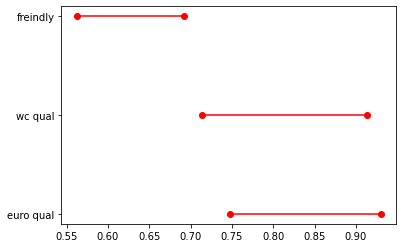

In [62]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['euro qual or wc Qual or freindly']))